# **Library yang digunakan**

In [ ]:
from nltk.tokenize import word_tokenize
import pandas as pd
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, make_scorer, accuracy_score
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-08-28 05:23:55.660836: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 8.5 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


# **Read Data**

In [ ]:
df = pd.read_csv('RT_FIX.csv')

In [ ]:
df.dropna()

,Unnamed: 0,Text,Sentiment
0,6872,minecraft isnt the best test for rtx try cyber...,2
1,4820,i think crysis looked pretty horrible with it...,1
2,53,yo is cyberpunk a good buy now ive put off buy...,1
3,9728,i think you misspelled a leech,3
4,10194,i can tell the difference my frame rate drops,3
...,...,...,...
2300,8747,look closelier very rarely used adverb for c...,1
2301,16007,gta on high graphics is still better than thi...,2
2302,3762,so you didnt lock the fps on both to like or,1
2303,18250,erectilesceptile ok for me its p k you running...,1


In [ ]:
df['Sentiment'].value_counts()

1    782
3    769
2    754
Name: Sentiment, dtype: int64

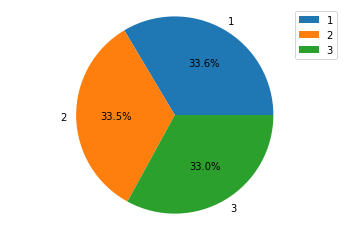

In [ ]:
import matplotlib.pyplot as plt

name = ['1','2','3']
freqs = [854, 852, 839]
plt.pie(freqs,labels=name,autopct='%0.1f%%')
plt.legend(name)
plt.axis('equal')

plt.show()

# **Preprocessing**

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

In [ ]:
def remove_non_ascii(s):
    return "".join(c for c in s if ord(c)<128)

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f" 
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
df['Text'] = df['Text'].astype(str)
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].apply(lambda x: remove_punct(x))
df['Text'] = df['Text'].apply(lambda x: remove_non_ascii(x))
df['Text'] = df['Text'].str.replace('â€™', '\'')
df['Text'] = df['Text'].apply(remove_emojis)

In [ ]:
df.head(30)

,Unnamed: 0,Text,Sentiment
0,6872,minecraft isnt the best test for rtx try cyber...,2
1,4820,i think crysis looked pretty horrible with it...,1
2,53,yo is cyberpunk a good buy now ive put off buy...,1
3,9728,i think you misspelled a leech,3
4,10194,i can tell the difference my frame rate drops,3
5,18073,a game with just good graphics and they call ...,1
6,8511,rtx high fps loss for minimal visual gains id...,1
7,5193,look closlier,3
8,4060,in bfv urban maps with rtx on you can literall...,1
9,11046,thomas k old one didnt have dlss either and p...,1


In [ ]:
def tokenization(text):
  text = word_tokenize(text)
  return text

In [ ]:
stop_words = nltk.corpus.stopwords.words('english') 
def stopwords(text):
  text = [word for word in text if word not in stop_words]
  return text

In [ ]:
df['Tokenized'] = df['Text'].apply(tokenization)
df['Stopwords'] = df['Tokenized'].apply(stopwords)

In [ ]:
df.head()

,Unnamed: 0,Text,Sentiment,Tokenized,Stopwords
0,6872,minecraft isnt the best test for rtx try cyber...,2,"[minecraft, isnt, the, best, test, for, rtx, t...","[minecraft, isnt, best, test, rtx, try, cyberp..."
1,4820,i think crysis looked pretty horrible with it...,1,"[i, think, crysis, looked, pretty, horrible, w...","[think, crysis, looked, pretty, horrible, cube..."
2,53,yo is cyberpunk a good buy now ive put off buy...,1,"[yo, is, cyberpunk, a, good, buy, now, ive, pu...","[yo, cyberpunk, good, buy, ive, put, buying, s..."
3,9728,i think you misspelled a leech,3,"[i, think, you, misspelled, a, leech]","[think, misspelled, leech]"
4,10194,i can tell the difference my frame rate drops,3,"[i, can, tell, the, difference, my, frame, rat...","[tell, difference, frame, rate, drops]"


In [ ]:
def joined(text):
  text = " ".join(text)
  return text

In [ ]:
df['Stopwords'] = df['Stopwords'].apply(lambda x: joined(x))

In [ ]:
import spacy

In [ ]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [ ]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [ ]:
df['Vectorizer'] = df['Stopwords'].apply(lambda x: get_vec(x))

In [ ]:
df[['Text','Vectorizer']]

,Text,Vectorizer
0,minecraft isnt the best test for rtx try cyber...,"[1.0128754, 2.5631902, -2.0663493, -0.6527366,..."
1,i think crysis looked pretty horrible with it...,"[-0.5293187, 1.4490958, -1.6445445, -0.5595748..."
2,yo is cyberpunk a good buy now ive put off buy...,"[-1.3259783, 1.1602671, -2.7914624, -0.0866209..."
3,i think you misspelled a leech,"[-0.47499, 0.55305666, 0.7446367, -1.7682967, ..."
4,i can tell the difference my frame rate drops,"[0.35160005, 1.408932, -2.5267873, 1.3930199, ..."
...,...,...
2300,look closelier very rarely used adverb for c...,"[-0.37453896, 0.6374959, -0.04322803, -0.27853..."
2301,gta on high graphics is still better than thi...,"[-0.40409294, 1.0312184, -2.3213499, 0.93779, ..."
2302,so you didnt lock the fps on both to like or,"[-0.551592, 6.20432, -4.2617836, 0.56231755, -..."
2303,erectilesceptile ok for me its p k you running...,"[-1.3830141, 4.0430503, -0.1763, 0.68028843, -..."


In [ ]:
df['Vectorizer'][0].shape

(300,)

In [ ]:
final = pd.DataFrame({'Vector':df['Vectorizer'], 'Sentiment':df['Sentiment']})
final.head()

,Vector,Sentiment
0,"[1.0128754, 2.5631902, -2.0663493, -0.6527366,...",2
1,"[-0.5293187, 1.4490958, -1.6445445, -0.5595748...",1
2,"[-1.3259783, 1.1602671, -2.7914624, -0.0866209...",1
3,"[-0.47499, 0.55305666, 0.7446367, -1.7682967, ...",3
4,"[0.35160005, 1.408932, -2.5267873, 1.3930199, ...",3


In [ ]:
X = final['Vector'].to_numpy()
X = X.reshape(-1, 1)

In [ ]:
import numpy as np
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)
y = final['Sentiment']

In [ ]:
X[0].shape

(300,)

In [ ]:
X

array([[ 1.0128754 ,  2.5631902 , -2.0663493 , ..., -1.4824936 ,
        -2.1296308 ,  2.1944482 ],
       [-0.5293187 ,  1.4490958 , -1.6445445 , ..., -0.76085824,
        -2.5973668 ,  0.19145083],
       [-1.3259783 ,  1.1602671 , -2.7914624 , ..., -1.4699429 ,
        -2.8251927 ,  0.04094703],
       ...,
       [-0.551592  ,  6.20432   , -4.2617836 , ..., -0.05044002,
        -2.1536202 ,  1.8204882 ],
       [-1.3830141 ,  4.0430503 , -0.1763    , ..., -0.36781427,
        -1.8432485 ,  1.4339756 ],
       [-0.53735673,  1.0832607 , -0.93845755, ..., -0.40644264,
        -2.7461112 ,  0.59595066]], dtype=float32)

# **Model Klasifikasi**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=6)

In [ ]:
model = SVC(kernel = 'rbf', gamma = 1, C = 1)
model.fit(X_train, y_train) 

SVC(C=1, gamma=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([3, 1, 3, 1, 3, 2, 1, 3, 1, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 3, 2, 3, 1, 1, 2, 1, 1, 2, 3, 1, 2,
       1, 1, 2, 2, 3, 2, 1, 2, 3, 2, 2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 3, 1,
       3, 2, 3, 2, 2, 1, 3, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 2, 3,
       1, 3, 2, 1, 1, 3, 3, 3, 1, 1, 2, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3,
       2, 3, 2, 2, 2, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 3,
       3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 1, 2, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 3, 1, 3, 1, 2, 3, 1, 3, 3, 1,
       3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 1, 3, 3, 2, 3,
       2, 1, 3, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 2, 1, 2, 1, 2, 2, 1, 1, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 2, 3, 1, 2, 1, 3, 1, 3, 3, 1, 3,
       3, 1, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 1, 1, 1, 3, 2, 3, 3, 2, 3,
       1, 1, 3, 2, 2, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1,

In [ ]:
cek = list(y_pred)
print(cek.count(1))
print(cek.count(2))
print(cek.count(3))

437
1
23


In [ ]:
data = data = {
  "Text": ['it probably took a big effort to make this  not by you by your pc rip your pc','i cant even get  fps normally without shaders lol','minecraft has its own feeling realistic graphic looks good but it doesnt give us feeling of minecraft that blocky game','whats rtx','im watching this video in p because my computer cannot stand even this video lmao iwtd','everyone just had epic pc and im just sitting here with my old laptop and still using core i without graphics card c','crysis is so bad it hasnt a walk animation','that was so fuckin good that i just start sleeping so relax','nice but nothing against ray tracing','what is your monitor man']
}
new_df = pd.DataFrame(data)

In [ ]:
new_df['Text'] = new_df['Text'].astype(str)

In [ ]:
new_df['Text'] = new_df['Text'].str.lower()
new_df['Text'] = new_df['Text'].apply(remove_punct)
new_df['Text'] = new_df['Text'].apply(remove_non_ascii)
new_df['Text'] = new_df['Text'].str.replace('â€™', '\'')
new_df['Text'] = new_df['Text'].apply(remove_emojis)

In [ ]:
new_df['Tokenized'] = new_df['Text'].apply(tokenization)
new_df['Stopwords'] = new_df['Tokenized'].apply(stopwords)
new_df['Stopwords'] = new_df['Stopwords'].apply(joined)
new_df['Vector'] = new_df['Stopwords'].apply(get_vec)

In [ ]:
test = new_df['Vector'].to_numpy()
test = test.reshape(-1, 1)

In [ ]:
test = np.concatenate(np.concatenate(test, axis = 0), axis = 0).reshape(-1, 300)

In [ ]:
pred = model.predict(test) 

In [ ]:
print(pred)

[3 1 1 3 3 3 2 1 1 1]


# **Evaluasi dengan Cross Validation**

In [ ]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

# Nested CV with parameter optimization
nested_score = cross_val_score(SVC(kernel = 'rbf', gamma = 1, C = 1), X=X, y=y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

           1       0.36      1.00      0.53       782
           2       0.67      0.01      0.01       754
           3       0.95      0.17      0.29       769

    accuracy                           0.40      2305
   macro avg       0.66      0.39      0.28      2305
weighted avg       0.66      0.40      0.28      2305



In [ ]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

# Nested CV with parameter optimization
nested_score = cross_val_score(SVC(kernel = 'sigmoid'), X=X, y=y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

           1       0.58      0.54      0.56       782
           2       0.51      0.44      0.47       754
           3       0.47      0.57      0.51       769

    accuracy                           0.51      2305
   macro avg       0.52      0.51      0.51      2305
weighted avg       0.52      0.51      0.51      2305



In [ ]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

# Nested CV with parameter optimization
nested_score = cross_val_score(SVC(kernel = 'poly'), X=X, y=y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

           1       0.67      0.59      0.63       782
           2       0.59      0.53      0.56       754
           3       0.61      0.74      0.67       769

    accuracy                           0.62      2305
   macro avg       0.62      0.62      0.62      2305
weighted avg       0.62      0.62      0.62      2305



In [ ]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

# Nested CV with parameter optimization
nested_score = cross_val_score(SVC(kernel = 'linear'), X=X, y=y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

           1       0.61      0.67      0.64       782
           2       0.59      0.59      0.59       754
           3       0.71      0.63      0.67       769

    accuracy                           0.63      2305
   macro avg       0.64      0.63      0.63      2305
weighted avg       0.64      0.63      0.63      2305

